# Matplotlib: plotting

**Sources**
- Nicolas P. Rougier: http://www.labri.fr/perso/nrougier/teaching/matplotlib

## Basic plots

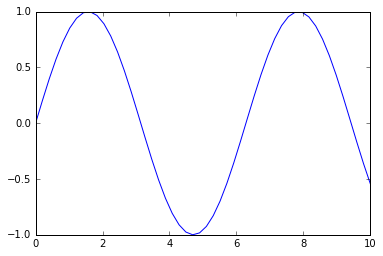

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 10, 50)
sinus = np.sin(x)

plt.plot(x, sinus)
plt.show()

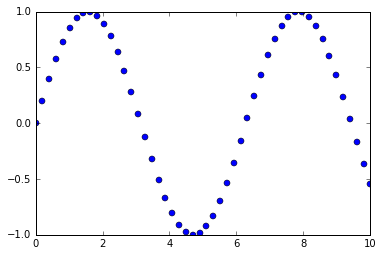

In [78]:
plt.plot(x, sinus, "o")
plt.show()
# use plt.plot to get color / marker abbreviations

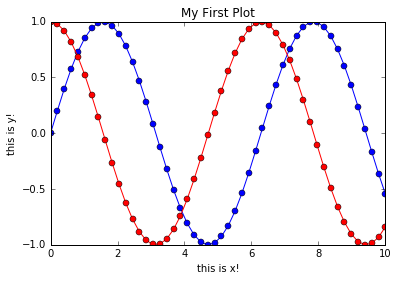

In [79]:
# Rapid multiplot

cosinus = np.cos(x)
plt.plot(x, sinus, "-b", x, sinus, "ob", x, cosinus, "-r", x, cosinus, "or")
plt.xlabel('this is x!')
plt.ylabel('this is y!')
plt.title('My First Plot')
plt.show()

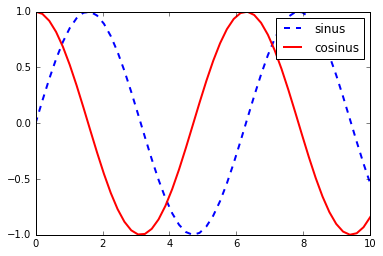

In [80]:
# Step by step
plt.plot(x, sinus, label='sinus', color='blue', linestyle='--', linewidth=2)
plt.plot(x, cosinus, label='cosinus', color='red', linestyle='-', linewidth=2)
plt.legend()
plt.show()

## Scatter (2D) plots

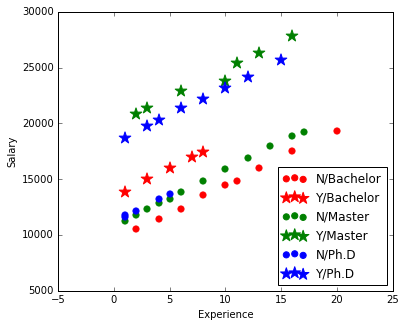

In [93]:
import pandas as pd
url = 'ftp://ftp.cea.fr/pub/unati/people/educhesnay/pylearn_doc/data/salary_table.csv'
salary = pd.read_csv(url)
salary.E = salary.E.map({1:'Bachelor', 2:'Master', 3:'Ph.D'})
salary.M = salary.M.map({0:'N', 1:'Y'})

## Outcome
## S: salaries for IT staff in a corporation.
## Predictors:
## X: experience (years)
## E: education (1=Bachelor's, 2=Master's, 3=Ph.D)
## M: management (1=management, 0=not management)

## Figure size
plt.figure(figsize=(6,5))

## Define colors / sumbols manually
symbols_manag = dict(Y='*', N='.')
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}

## group by education x management => 6 groups
for values, d in salary.groupby(['E','M']):
    edu, manager = values
    plt.scatter(d['X'], d['S'], marker=symbols_manag[manager], color=colors_edu[edu],
               s=150, label=manager+"/"+edu)

## Set labels
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(loc=4)  # lower right
plt.show()

## Exploring data using seaborn

**Sources**: http://stanford.edu/~mwaskom/software/seaborn

Install using: `pip install seaborn` or `conda install seaborn`

## Exploring the data

### Boxplot

Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.

![title](images/boxplot.png)

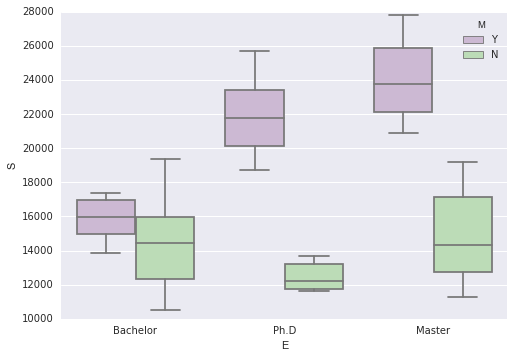

In [116]:
import seaborn as sns


sns.boxplot(x="E", y="S", hue="M", data=salary, palette="PRGn")

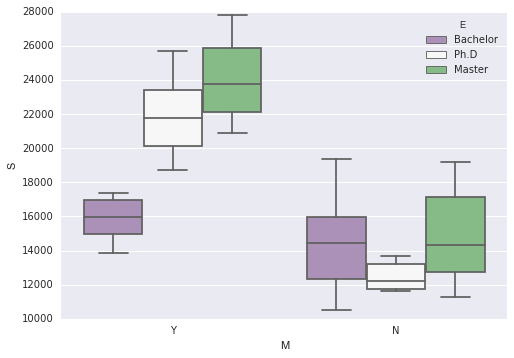

In [117]:
sns.boxplot(x="M", y="S", hue="E", data=salary, palette="PRGn")

## Densisty plot with one figure containing multiple axis

One figure can contain several axis, whose contain the graphic elements

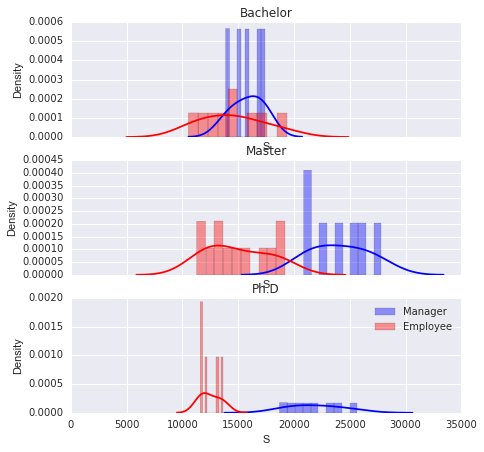

In [122]:
# Set up the matplotlib figure: 3 x 1 axis

f, axes = plt.subplots(3, 1, figsize=(7, 7), sharex=True)

i = 0
for edu, d in salary.groupby(['E']):
    sns.distplot(d.S[d.M=="Y"], color="b", bins=10, label="Manager", ax=axes[i])
    sns.distplot(d.S[d.M=="N"], color="r", bins=10, label="Employee", ax=axes[i])
    axes[i].set_title(edu)
    axes[i].set_ylabel('Density')
    i+= 1
plt.legend()

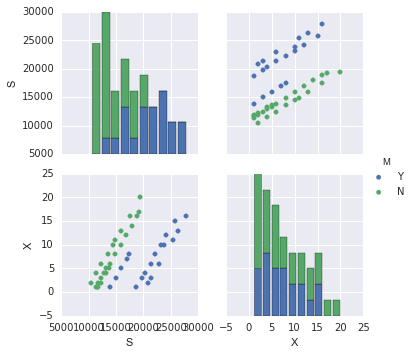

In [124]:
g = sns.PairGrid(salary, hue="M")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()